In [2]:
# import piplite
# await piplite.install(['openpyxl==3.0.09'])
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
pip install matplotlib

In [4]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
# resp = fetch(URL)
# text = io.BytesIO((await resp.arrayBuffer()).to_py())

df_can = pd.read_excel(URL, 
#     text,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)
print('Data downloaded and read into data frame')


Data downloaded and read into data frame


In [5]:
df_can.head()
df_can.tail()
df_can.columns
df_can.index
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [6]:
df_can.columns.tolist()
# df_can.index.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [7]:
df_can.shape

(195, 43)

In [8]:
df_can.drop(['AREA', 'REG','DEV','Type','Coverage'], axis = 1, inplace=True)


In [9]:
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
df_can.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent','RegName': 'Region'}, inplace= True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df_can['Total'] = df_can.sum(axis =1)
df_can.head()

C:\Users\Errol\AppData\Local\Temp\ipykernel_17368\2573896478.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis =1)


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [12]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [13]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [14]:
df_can.Country
df_can[['Country', 1980, 1985]]


,Country,1980,1985
0,Afghanistan,16,340
1,Albania,1,0
2,Algeria,80,44
3,American Samoa,0,0
4,Andorra,0,0
...,...,...,...
190,Viet Nam,1191,5907
191,Western Sahara,0,0
192,Yemen,1,18
193,Zambia,11,9


In [15]:
df_can.set_index('Country', inplace = True)

In [16]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [17]:
df_can.loc['Japan']
df_can[df]

NameError: name 'df' is not defined

In [ ]:
df_can[df_can.index == 'Japan']

In [ ]:
df_can.loc['Japan', 2013]

In [ ]:
# df_can.loc['Japan', [1980, 1985]]
df_can.columns

In [ ]:
df_can.columns = list(map(str, df_can.columns))
df_can.columns

In [ ]:
years = list(map(str, range(1980, 2014)))
years

In [ ]:
condition = df_can['Continent'] == 'Asia'
print(condition)
df_can[condition]

In [ ]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

In [ ]:
print('Matplotlib version: ', mpl.__version__)
mpl.style.use(['ggplot'])

In [ ]:
# haiti = df_can.loc['Haiti', years]
# pd.DataFrame(years).dtypes

df_can.loc['Haiti', years]


In [ ]:
# df_can.get.loc('Haiti')
df_can.dtypes

In [ ]:
df_can

In [26]:
df_can.sort_values(['Total'], ascending = False, axis = 0, inplace = True)

In [27]:
df_top5 = df_can.head(5)
years = list(map(str, range(1980, 2014)))
df_top5 = df_top5.transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
Continent,Asia,Asia,Europe,Asia,Asia
Region,Southern Asia,Eastern Asia,Northern Europe,South-Eastern Asia,Southern Asia
DevName,Developing regions,Developing regions,Developed regions,Developing regions,Developing regions
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691


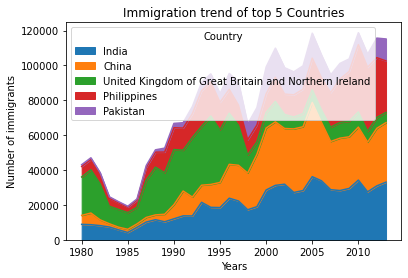

In [30]:

# df_top5[['India', 'China']]
df_top6 = df_top5.drop(['Continent','Region','DevName','Total'])
# df_top5
df_top6.plot(kind='area')

plt.title('Immigration trend of top 5 Countries')

plt.ylabel('Number of immigrants')
plt.xlabel('Years')


plt.show()



In [48]:
df_can[2013].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

Text(0.5, 1.0, 'Histogram of immigration from 195 countries in 2013')

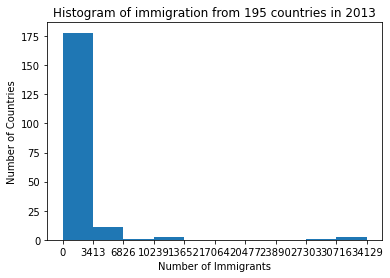

In [44]:
count, bin_edges = np.histogram(df_can[2013])

df_can[2013].plot(kind='hist', xticks = bin_edges)

plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.title('Histogram of immigration from 195 countries in 2013')


# df_can


In [56]:
years = list(map(int, range(1980, 2014)))
df_iceland = df_can.loc['Iceland', years]
df_iceland

1980    17
1981    33
1982    10
1983     9
1984    13
1985     6
1986    11
1987    11
1988     7
1989     3
1990     2
1991    11
1992    17
1993    15
1994    11
1995     9
1996    14
1997    11
1998    20
1999    17
2000     9
2001    26
2002    11
2003    17
2004    23
2005    10
2006     2
2007    15
2008    13
2009    15
2010    30
2011    38
2012    42
2013    72
Name: Iceland, dtype: object

Text(0, 0.5, 'Number of Immigrants')

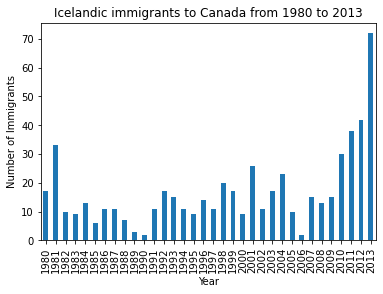

In [59]:
df_iceland[years].plot(kind='bar')

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')